In [12]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons

In [84]:
n_samples = 1000
centers = [[0,0], [1.5,2.0]]

In [9]:
X, y = make_blobs(n_samples=n_samples, n_features=2, centers = centers)

In [85]:
X, y = make_moons(n_samples=n_samples)

In [60]:
X = np.array([[0.5, 1.0],
             [1.4, -0.3],
             [1.1, 0.8],
             [-0.4, 1.0],
             [-0.8, -1.5],
             [-2.1, 0.5]])

y = np.array([1.,1.,1.,0.,1.,1.])

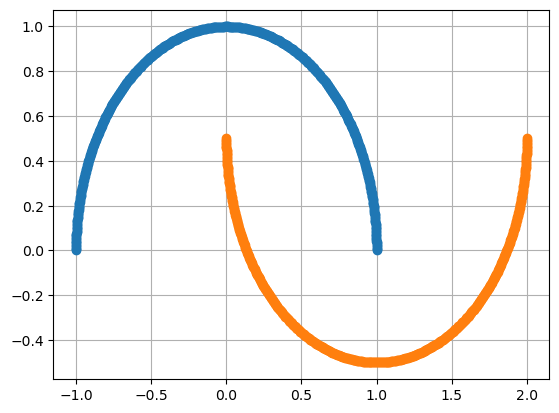

In [86]:
for k in range(len(centers)):
    members = y == k
    plt.plot(X[members, 0], X[members, 1], 'o')
plt.grid(True)

In [88]:
xt = torch.tensor(X, dtype=torch.float)
yt = torch.tensor(y, dtype=torch.float)
#xt[0], yt[0]
#yt

# Using NN

In [9]:
model = nn.Sequential(
                nn.Linear(2, 1),
                nn.Sigmoid())

In [89]:
model = nn.Sequential(
                nn.Linear(2, 10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,1),
                nn.Sigmoid())

In [90]:
model(torch.tensor([[1.0, 2.0]]))

tensor([[0.5451]], grad_fn=<SigmoidBackward0>)

In [74]:
y_pred_probs = torch.round(model(xt).squeeze())
y_pred_probs

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<RoundBackward0>)

In [93]:
loss_fn = nn.BCEWithLogitsLoss()
# loss_fn(y_pred_probs, yt)

In [102]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [103]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [104]:
def training_loop(n_epochs, optimizer, model, loss_fn, xt, yt):
    for epoch in range(1, n_epochs + 1):
        y_logits = model(xt).squeeze()

        y_pred_probs = torch.round(y_logits)
        acc = accuracy_fn(y_pred_probs, yt)
        
        loss_train = loss_fn(y_logits, yt)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}, Accuracy {acc}")

In [106]:
training_loop(n_epochs = 5000, optimizer = optimizer, model = model, loss_fn = loss_fn, xt = xt, yt = yt)

Epoch 1, Training loss 0.5472, Accuracy 90.4
Epoch 1000, Training loss 0.5356, Accuracy 93.8
Epoch 2000, Training loss 0.5135, Accuracy 100.0
Epoch 3000, Training loss 0.5072, Accuracy 100.0
Epoch 4000, Training loss 0.5054, Accuracy 100.0
Epoch 5000, Training loss 0.5046, Accuracy 100.0


In [107]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.9710,  0.4739],
         [ 0.8113, -0.5752],
         [ 0.3378,  0.2118],
         [-0.7140,  0.4634],
         [-0.5668,  0.1608],
         [-1.9863,  0.1283],
         [-1.8027, -0.1598],
         [ 1.6034,  0.0419],
         [-0.4480,  0.7226],
         [ 0.7906, -0.7195]], requires_grad=True),
 Parameter containing:
 tensor([-0.2119,  0.8386,  0.8210,  1.2954,  1.0736, -0.0594,  1.8054, -0.0207,
          0.8916,  0.8679], requires_grad=True),
 Parameter containing:
 tensor([[ 3.8297e-01, -4.1560e-01,  1.0431e-01,  6.2893e-01,  8.9008e-02,
           6.7411e-01, -6.8143e-01,  6.2912e-01,  3.7755e-01, -1.0910e-01],
         [ 2.0590e-01,  8.3312e-02, -3.2912e-02, -1.0056e-01, -2.2646e-01,
           5.2819e-03,  3.1390e-01, -6.4285e-02, -5.2168e-02,  1.2617e-01],
         [ 1.1064e-01,  4.7339e-01,  2.8062e-01, -3.9558e-02, -1.6186e-01,
          -4.3919e-01,  1.9934e-01,  1.9541e-01, -3.6060e-02,  1.2202e-01],
         [ 1.4032e-01, -1.1813e-01, 

In [110]:
torch.round(model(xt).squeeze()) == yt

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

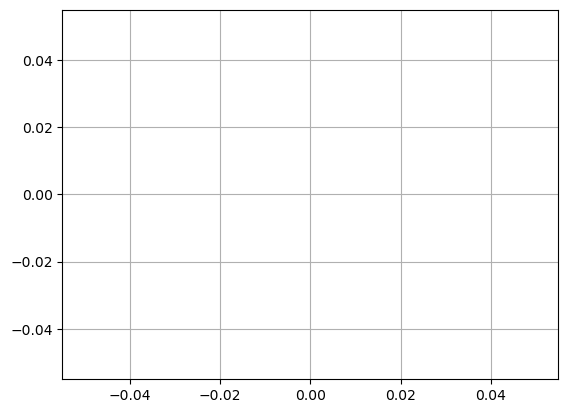

In [111]:
for k in range(len(centers)):
    members = y == k
    plt.plot(X[members, 0], X[members, 1], 'o')

members = torch.round(model(xt).squeeze()) != yt
plt.plot(X[members, 0], X[members, 1], 'kx', markersize=15)
plt.grid(True)

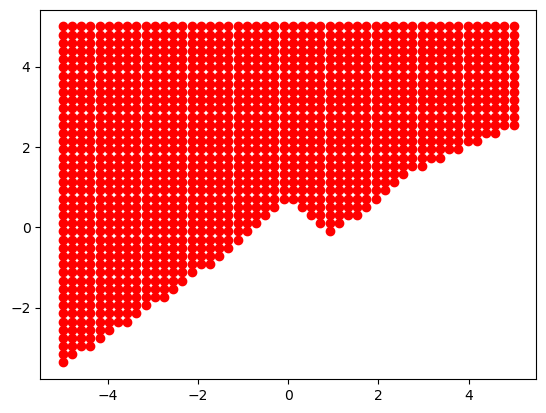

In [109]:
xs = np.linspace(-5., 5., num = 50, dtype=float)

for x in xs:
    for y in xs:
        pred = torch.round(model(torch.tensor([float(x), float(y)])).squeeze())
        d = pred == 0
        if(d):
            plt.plot(x,y,'ro')